# 04.Regression

In [1]:
%matplotlib inline

The goal of this chapter is to take a tour of some regression algorithms, build up an understanding of how they differ from one another and when to use them, and show how their parameters work.

We will journey through:
* linear regression (with gradient descent) 
* polynomial (with bayesian)
* regression trees
* isotonic detour (broken stick) 
* logit and softmax

## Overview

When we look at our data, our minds start to seek out patterns. Even before we apply all our statistics knowledge, our minds look for shapes and repeating figures. Augmenting our senses with mathematical analysis and inference tools such that we can observe even more patterns in the world around, is one of the many joys of data science.

## Linear regression

Each regression has a function that defines how it calculates the line of best fit, as well as a function defining the cost function it uses. Let's get comfortable with these two concepts so we can watch them change with each regression. 

There are two ways we can write a regression prediction function:

$\hat{y} = \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} ...+ \theta_{n}x_{n}$

$\hat{y} = \theta^T\cdot(\mathbf{x})$

The first shows us that there is an initial bias term $\theta_{0}$, which serves as the intercept of our function, and then a series of weighted paramters multipled by each of our input features.  

The second equation shows the same thing, only the row of parameters has been flipped on its side and transposed into a column of values, the matrix $\theta^T$. The same thing has been done to all the x's, which have been bundled up into their own matrix $\mathbf{x}$. The little dot between them is a dot product, which, when performed on these matrices, yields what we see in the first equation. For a fabulous review of linear algegra notation, check out: https://github.com/ageron/handson-ml/blob/master/math_linear_algebra.ipynb

The goal is to find the correct weights for each feature that will yield the most accurate target output. To find these ideal parameter weights, we must use some kind of cost function, and the convention is to use Mean Square Error (MSE):

$MSE(\theta) = \frac{1}{m}\sum_{i=1}^m(\theta^T\cdot\mathbf{x}^i - y^i)^2$

The part in the parenthes after the $\sum$ should look familiar. It is the difference between our predicted $\hat{y}$, value and the actual $y$ value for the $i$ instance. Square these differences, sum them across all $m$ instances, and divide by the number $m$, and you've got your MSE. 

### Gradient Descent

Are there programatic ways to optimize our parameters?

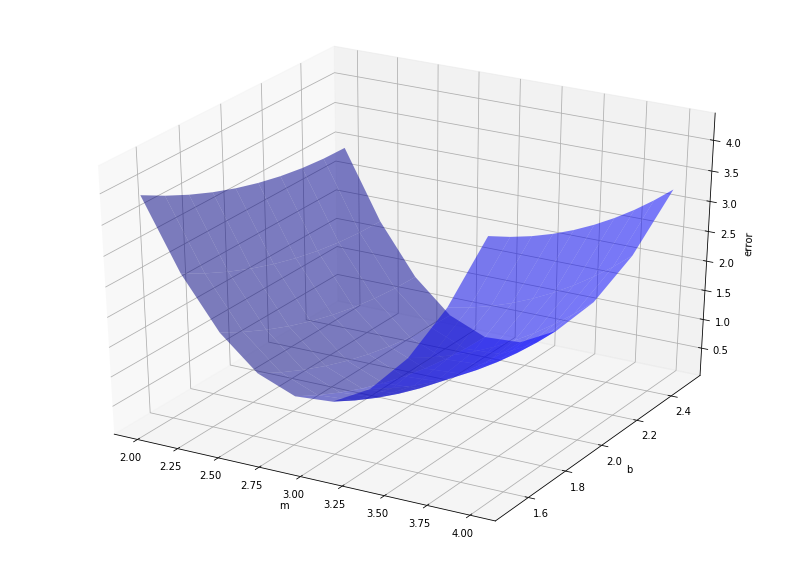

In [5]:
#https://stackoverflow.com/questions/28542686/3d-plot-of-the-error-function-in-a-linear-regression

import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

def error(m, b, points):
    totalError = 0
    for i in range(0, len(points)):
        totalError += (points[i].y - (m * points[i].x + b)) ** 2
    return totalError / float(len(points))

x = y = np.arange(-3.0, 3.0, 0.05)
Point = collections.namedtuple('Point', ['x', 'y'])

m, b = 3, 2
noise = np.random.random(x.size)
points = [Point(xp, m*xp+b+err) for xp,err in zip(x, noise)]

fig = plt.figure(figsize = (14, 10))
ax = fig.add_subplot(111, projection='3d')

ms = np.linspace(2.0, 4.0, 10)
bs = np.linspace(1.5, 2.5, 10)

M, B = np.meshgrid(ms, bs)
zs = np.array([error(mp, bp, points) 
               for mp, bp in zip(np.ravel(M), np.ravel(B))])
Z = zs.reshape(M.shape)

ax.plot_surface(M, B, Z, rstride=1, cstride=1, color='b', alpha=0.5)

ax.set_xlabel('m')
ax.set_ylabel('b')
ax.set_zlabel('error')

plt.show()

### Regularized linear regression (ridge, lasso, elastic net)

There are three regularized versions of linear regression that I want to mention in passing, as they will come in handy when trying to reduce overfitting of your data. Basically, if you normalize the data in some way before optimizing your cost function, you can increase your liklihood of building a model that is more useful in novel situations. There are three tools often used to bound the weights so they can only get so large or small. 

Ridge regression adds a regulization term

Lasso regression adds a different regularization term

Elastic Net applies whatever is the min of Ridge or Lasso

### Example

Ada Lovelace is having a rough day. It's the middle of the summer, and even though the air hot and humid, she's hacking away at a mathematical proof fully decked out in the attire of her times which requires her to wear layer upon layer of impractical clothes. There's a fly buzzing around the _______

## Polynomial regression

Most of the world's phenomena can not be explained by straight lines, and that's where polynomial regression comes in. 

### Bayesian approach

I find polynomial regressions to be useful, and I like them even better when they take on a Bayesian flavor.

## Regression trees

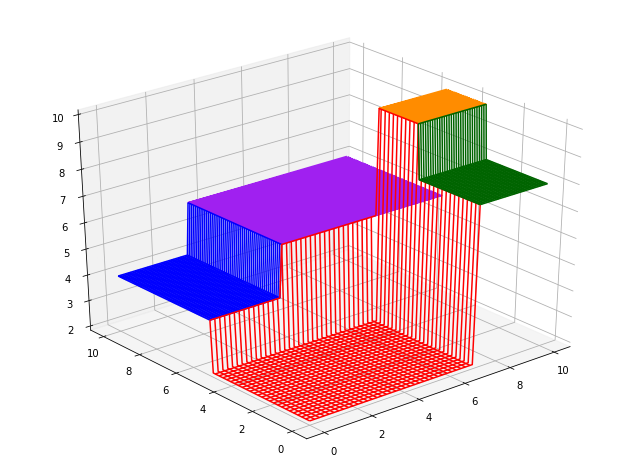

In [6]:
# Super cute graphic for regression trees from Kevin Murphy book

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import proj3d
import os

t1 = 5
t3 = 3
t2 = 7
t4 = 3

r = np.linspace(2, 10, 5)

#A function to return a tree for given (x1,x2) coordinates
def ManualTree(x1, x2):
    if x1 <= t1:
        if x2 <= t2:
            z = r[0]
        else:
            if x1 <= t3:
                z = r[3]
            else:
                z = r[4]
    else:
        if x2 <= t4:
            z = r[1]
        else:
            z = r[2]
    return(z)

ManualTree = np.vectorize(ManualTree)

x = np.linspace(0,10,100)
X, Y = np.meshgrid(x, x)
Z = ManualTree(X.T,Y.T)

#A 3D matrix for determining which colors go where.

def DivList(list1, den):
    return([e/den for e in list1])

#This tells us which color we use for which output tree value. Intended to match with the latex tree graphic.
def ColorMapper(z):
    if z == r[0]:
        out = DivList([255.0, 0.0, 0.0], 255.0)
    elif z == r[1]:
        out = DivList([0.0, 0.0, 255.0], 255.0)
    elif z == r[2]:
        out = DivList([160.0, 32.0, 240.0], 255.0)
    elif z == r[3]:
        out = DivList([0.0, 100.0, 0.0], 255.0)
    else:
        out = DivList([255.0, 140.0, 0.0], 255.0)
    return(out)

#Manually build the tree, one output tree value at a top. 
#For some spots, we need to add in the walls to show difference between two tree values.
fig = plt.figure(figsize=(20.0/1.8, 15.0/1.8))
ax = fig.add_subplot(111, projection='3d')
for val in r:   
    if val in [2, 4, 8]:
        logi = Z == val
        if val == 2:
            logi[50,0:70] = True
            logi[:51,70] = True
            shp = (51, 71)
        elif val == 4:
            logi[50:,30] = True
            shp = (50, 31)
        else:
            logi[30,70:] = True
            shp = (31, 30)
        x = X[logi].reshape(shp)
        y = Y[logi].reshape(shp)
        z = Z[logi].reshape(shp)
    else:
        x = X[Z==val]
        y = Y[Z==val]
        z = val
    ax.plot_wireframe(x, y, z, color=ColorMapper(val))
        
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.view_init(elev=30, azim=230)
plt.show()